# GRIP : The Spark Foundation

### Data Science Business Analytics Intern - November, 2022 [#GRIPNOV22]

### Author : Varsha S Thambi

### TASK 4 : Exploratory Data Analysis- Terrorism

Perform Exploratory Data Analysis on data set 'Global Terrorism'.As a security analyst,try to find out the hot zone of terrorism using EDA.

### Importing the dataset

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore the warnings
import warnings as wg
wg.filterwarnings("ignore")


In [2]:
# Reading data 
df=pd.read_csv(r"C:\Users\varsh\OneDrive\Desktop\Global Terrorism - START data\globalterrorismdb_0718dist.csv",encoding='latin1')

### Exploring Data

In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970000e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970000e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970000e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,2.020000e+11,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,2.020000e+11,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,2.020000e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,2.020000e+11,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,2.020000e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
# To find the number of rows and columns
df.shape

(181691, 135)

In [6]:
# To find more information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [7]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [8]:
df.rename(columns={'iyear':'year','imonth':'month','iday':'day','gname':'group','provstate':'state','city':'city','country_txt':'country_obj',
                    'latitude':'latitude','longitude':'longitude','summary':'summary','attacktype1_txt':'attacktype','targsubtype1_txt':'targettype','weaptype1_txt':'weapon',
                    'nkill':'kill','nwound':'wound'},inplace=True)

In [9]:
df=df[['year','month','day','group','region','state','city','latitude','longitude','summary','attacktype','targettype','weapon',
                    'kill','wound','motive','target1','country','country_obj','region_txt']]

In [10]:
df.shape

(181691, 20)

In [11]:
df['wound']=df['wound'].fillna(0)
df['kill']=df['kill'].fillna(0)

In [12]:
df.describe()

,year,month,day,region,latitude,longitude,kill,wound,country
count,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,7.160938,23.498343,-4.586957e+02,2.266860,2.883296,131.968501
std,13.259430,3.388303,8.814045,2.933408,18.569242,2.047790e+05,11.227057,34.309747,112.414535
min,1970.000000,0.000000,0.000000,1.000000,-53.154613,-8.618590e+07,0.000000,0.000000,4.000000
25%,1991.000000,4.000000,8.000000,5.000000,11.510046,4.545640e+00,0.000000,0.000000,78.000000
50%,2009.000000,6.000000,15.000000,6.000000,31.467463,4.324651e+01,0.000000,0.000000,98.000000
75%,2014.000000,9.000000,23.000000,10.000000,34.685087,6.871033e+01,2.000000,2.000000,160.000000
max,2017.000000,12.000000,31.000000,12.000000,74.633553,1.793667e+02,1570.000000,8191.000000,1004.000000


In [13]:
# Check data type
df.dtypes

year             int64
month            int64
day              int64
group           object
region           int64
state           object
city            object
latitude       float64
longitude      float64
summary         object
attacktype      object
targettype      object
weapon          object
kill           float64
wound          float64
motive          object
target1         object
country          int64
country_obj     object
region_txt      object
dtype: object

In [14]:
# Check missing values
df.isnull().sum()

year                0
month               0
day                 0
group               0
region              0
state             421
city              434
latitude         4556
longitude        4557
summary         66129
attacktype          0
targettype      10373
weapon              0
kill                0
wound               0
motive         131130
target1           636
country             0
country_obj         0
region_txt          0
dtype: int64

### Visualization 

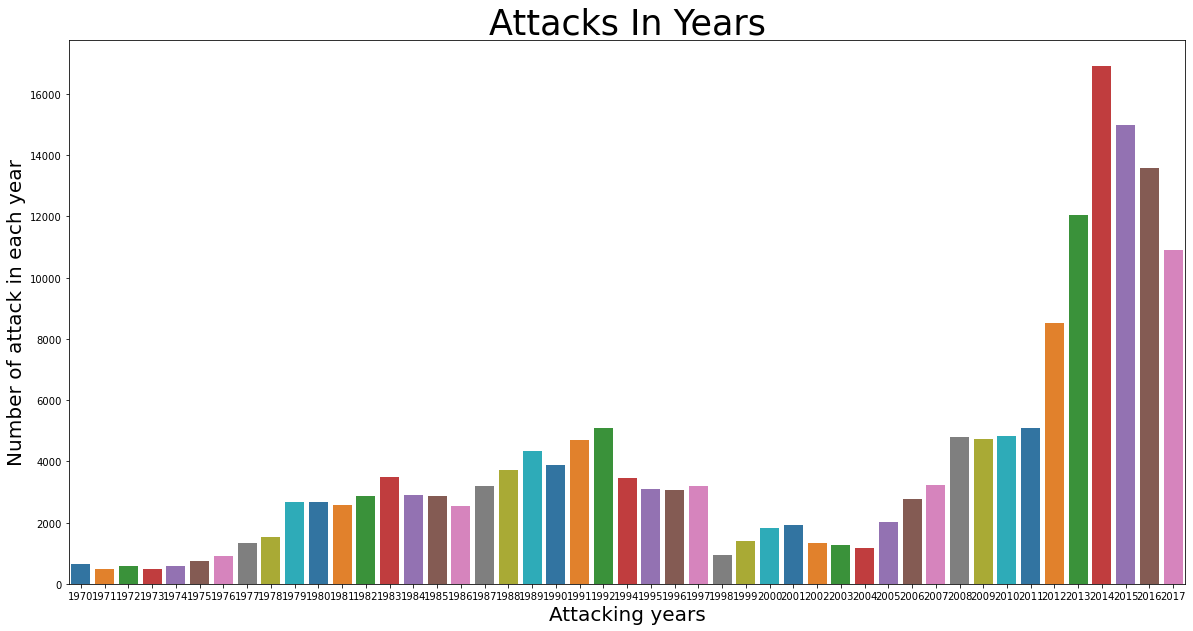

In [15]:
year=df['year'].unique()
year_count=df['year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(20,10))
sns.barplot(x=year,y=year_count,palette='tab10')
plt.xlabel("Attacking years",fontsize=20)
plt.ylabel("Number of attack in each year",fontsize=20)
plt.title("Attacks In Years",fontsize=35)
plt.show()

In [16]:
# Countries that are affected by terrorism
df['country_obj'].value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: country_obj, Length: 205, dtype: int64

In [17]:
# Top 10 countries that are affected by terrorism
df['country_obj'].value_counts()[:10]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country_obj, dtype: int64

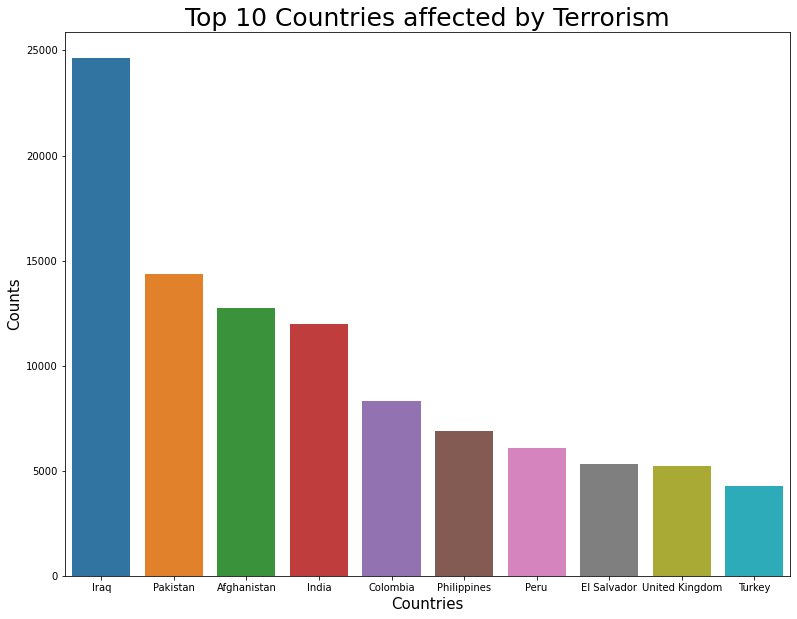

In [18]:
plt.figure(figsize=(13,10))
sns.barplot(df['country_obj'].value_counts()[:10].index,df['country_obj'].value_counts()[:10].values,palette='tab10')
plt.xlabel("Countries",fontsize=15)
plt.ylabel("Counts",fontsize=15)
plt.title("Top 10 Countries affected by Terrorism",fontsize=25)
plt.show()

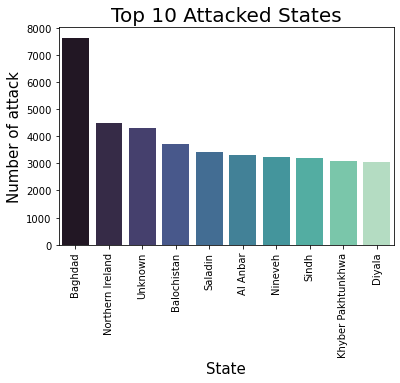

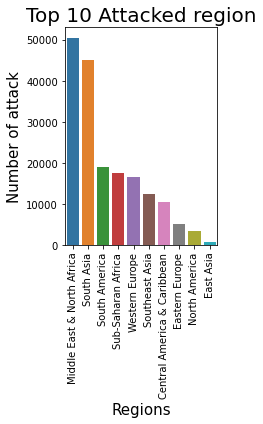

In [19]:
#State that were attacked more
plt.subplot(1,1,1)
sns.barplot(df['state'].value_counts()[:10].index,df['state'].value_counts()[:10].values,palette='mako')
plt.xlabel("State",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 Attacked States",fontsize=20)
plt.xticks(rotation=90)
plt.show()

#region that were attacked more
plt.subplot(1,2,2)
sns.barplot(df['region_txt'].value_counts()[:10].index,df['region_txt'].value_counts()[:10].values,palette='tab10')
plt.xlabel("Regions",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 Attacked region",fontsize=20)
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'No of people killed')

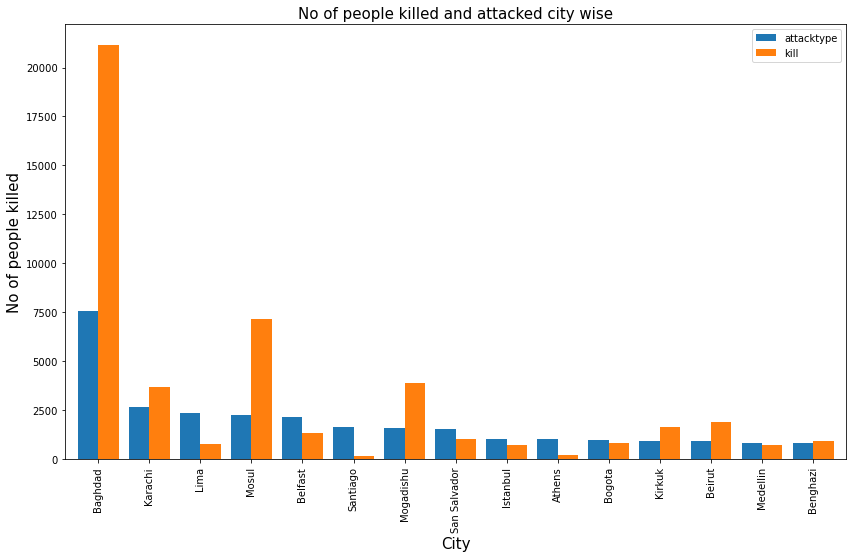

In [20]:
count_df=df['city'].value_counts().drop('Unknown').head(15).to_frame()
count_df.columns=['attacktype']
count_killed=df.groupby('city')['kill'].sum().to_frame()
count_df.merge(count_killed,left_index=True,right_index=True,how='left').plot.bar(width=0.8)
fig=plt.gcf()
fig.set_size_inches(14,8)
plt.title('No of people killed and attacked city wise',fontsize=15)
plt.xlabel('City',fontsize=15)
plt.ylabel('No of people killed',fontsize=15)


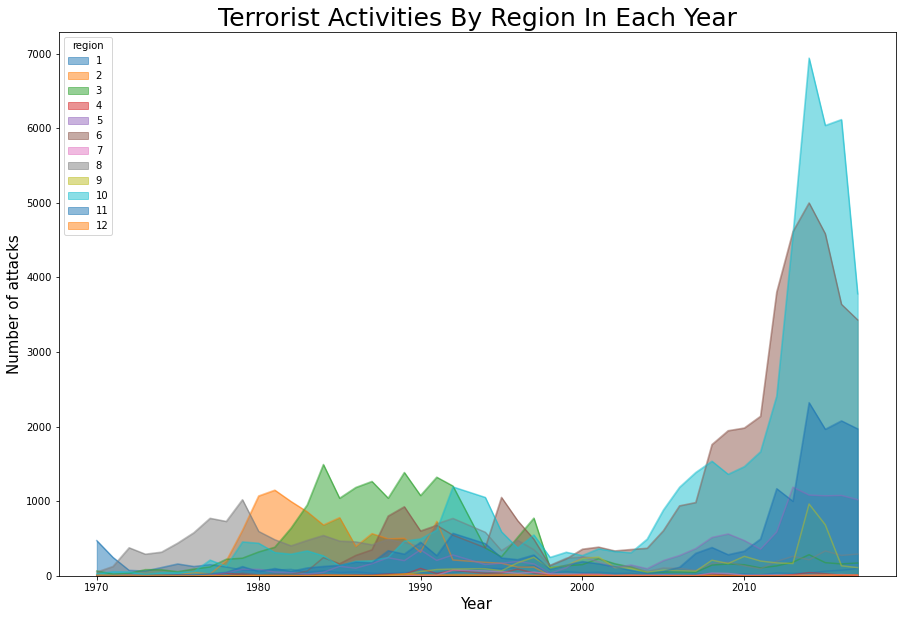

In [21]:
pd.crosstab(df.year,df.region).plot(kind="area",stacked=False,figsize=(15,10))
plt.title("Terrorist Activities By Region In Each Year",fontsize=25)
plt.ylabel("Number of attacks",fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.show()

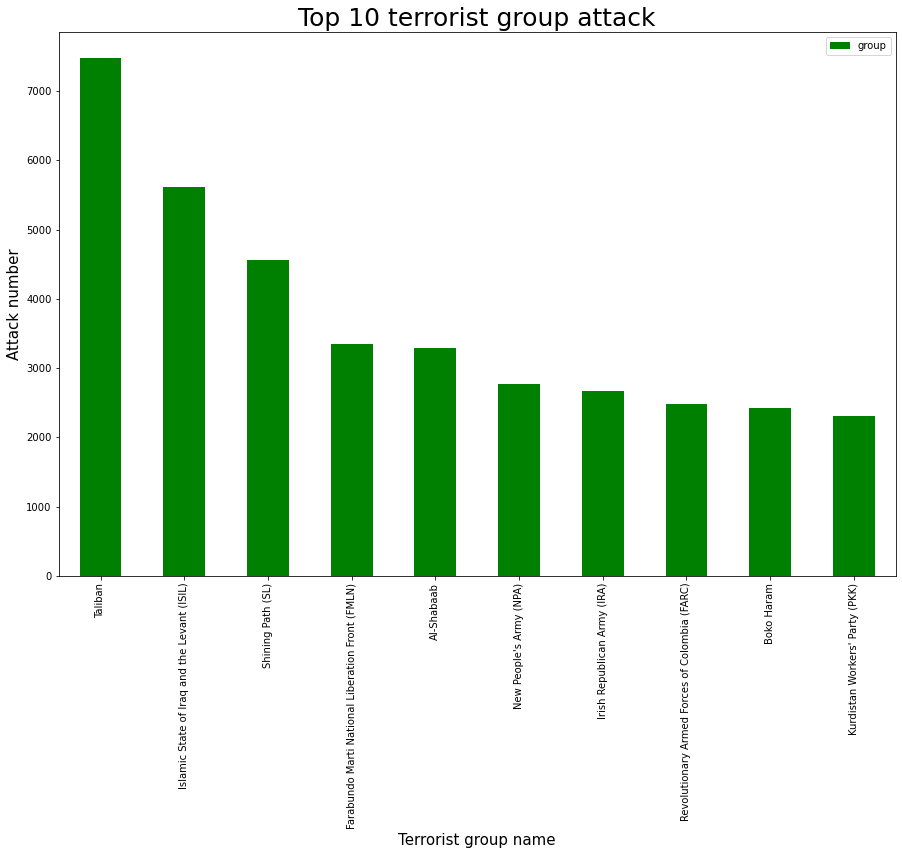

In [22]:
df['group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color="green",figsize=(15,10))
plt.title("Top 10 terrorist group attack",fontsize=25)
plt.ylabel("Attack number",fontsize=15)
plt.xlabel("Terrorist group name",fontsize=15)
plt.show()

In [23]:
df['attacktype'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [24]:
(df['attacktype'].value_counts())

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype, dtype: int64

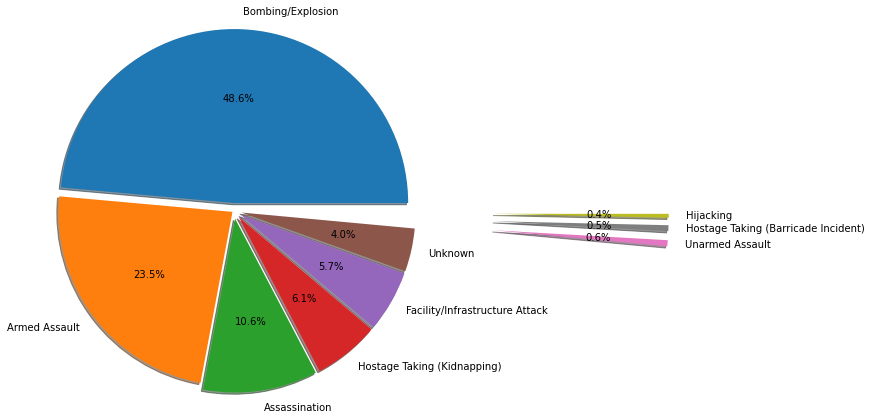

In [27]:
plt.pie(df.attacktype.value_counts(),labels=('Bombing/Explosion','Armed Assault','Assassination',
        'Hostage Taking (Kidnapping)','Facility/Infrastructure Attack', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)','Hijacking'),autopct="%1.1f%%",radius=2,shadow=True,
        explode=[.09,.02,.09,.09,.09,.09,3,3,3])
plt.show()

Text(0, 0.5, 'Count')

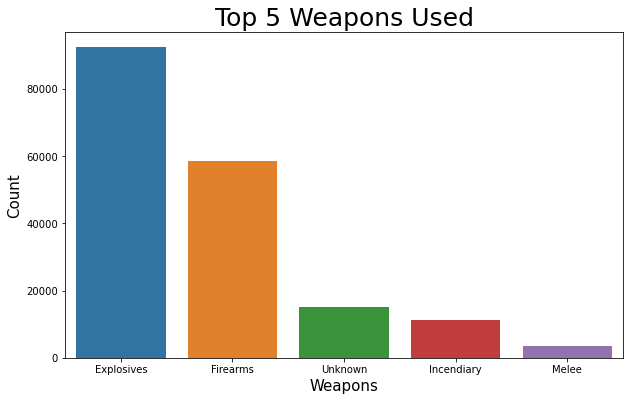

In [29]:
# top 5 weapons used by terrorist
plt.figure(figsize=(10,6))
sns.barplot(df['weapon'].value_counts()[:5].index,df['weapon'].value_counts()[:5].values,palette='tab10')
plt.title('Top 5 Weapons Used',fontsize=25)
plt.xlabel('Weapons',fontsize=15)
plt.ylabel('Count',fontsize=15)

### Conclusion

- Year with most attacks:2014


- Country with the most attacks:Iraq


- State with the most attacks:Baghdad


- Region with the most attacks:Middle East & North Africa


- City wise most no of people killed and attacked:Baghdad


- Group with the most attacks:Taliban


- Most attack type:Bombing/Explosion
